# Assignment 1

### Table of contents

    Importing libraries
    Particle class
    Collision class
    Model 
    Task 1
    Task 2 
    Task 3 
    Task 4

In [2]:
from system_class import*
from particle_classes import*
from matplotlib.patches import Rectangle
from scipy import optimize
from helper import *

##### Initial Conditions

Since the Boltzmann distribution assumes an ideal gass, the simulations in this project will make the same assumptions. Therefor the ideal gass law is used in the calculations.

In [3]:
mean_velocity = 461.3          #Mean velocity of oxygen at room temperature
mu = 1.66 * 10**(-27)          #Atomic weight
m_02 =2*16*mu                     #Weight of an oxygen atom
mol =  6.0221415 * 10**(23)

#The Gass is a Van der Waals gass
a = 1.382
b = 0.03186
R = 8.3144626181532

r_02 = 152*10**(-12)            #Radius of an oxygen atom
k = 1.38 * 10**(-23)       #Boltzmanns constant
T = 273 + 20                   #Kelvin at roomtemperature
P = 101325                     #atm

**Task 1**

In the cell below a system with 4000 particles with equal mass and mean velocities is set up. The system is then set to evolve over 10000 timesteps. And then finally the speed distribution of the gas is analysed. 

In [4]:
# Initial Conditions
num_particles =1000
n = num_particles/mol
def van(V): return  (P + a * n**2 / V**2)*( V-n*b) - n*R*T 
elasticity = 1
tc = 0

sol = optimize.root(van, 10**(-10), method='krylov')
x_b = y_b =  sol.x**(1/3)  #Box boundaries given in meters
mass = [m_02]
radius = [r_02]

system_1 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)    # Initializing the system
system_1.uniform_particles()                                                           # Putting the particles in the box with a uniform distribution
system_1.find_collisions()                                                             # Finding the collisions and adding them to a heapqueu                                         



In [5]:
vel_start = system_1.return_velocities()
times = 4
system_1.update(times)
vel_end = system_1.return_velocities()

In the three histograms below we see the initial speed distribution, the speed distribution after the system has reached equilibrium and the D Maxwell-Boltzmann distribution.

In [6]:
figure_1 = Boltzmann_comparison(vel_start, vel_end, np.linspace(0,mean_velocity*3,100) )
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'stairs'

<Figure size 1080x360 with 0 Axes>

**Task 2** 

In the cell below a system with 4000 particles with equal mass and mean velocities is set up. The system is then set to evolve over 10000 timesteps. And then finally the speed distribution of the gas is analysed. 

In [ ]:
# Initial Conditions
num_particles =1000
n = num_particles/mol
elasticity = 1

def van(V):  return (P + a * n**2 / V**2)*( V-n*b) - n*R*T 

sol = optimize.root(van, 10**(-10), method='krylov')
x_b = y_b =  sol.x**(1/3)  #Box boundaries given in meters
mass = [m_02, 4*m_02]
radius = [r_02]

system_2 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)
system_2.uniform_particles()
system_2.find_collisions()


In [ ]:
vel_start_2 = system_2.return_velocities()
times = 4000
system_2.update(times)
vel_end_2 = system_2.return_velocities()

In [ ]:
vel_start_m0 = vel_start_2[:int(system_2.num_particles/2)]
vel_start_4m0 = vel_start_2[int(system_2.num_particles/2):]

vel_end_m0 = vel_end_2[:int(system_2.num_particles/2)]
vel_end_4m0 = vel_end_2[int(system_2.num_particles/2):]

**Velocity distribution of the particles with mass equal to m0.**

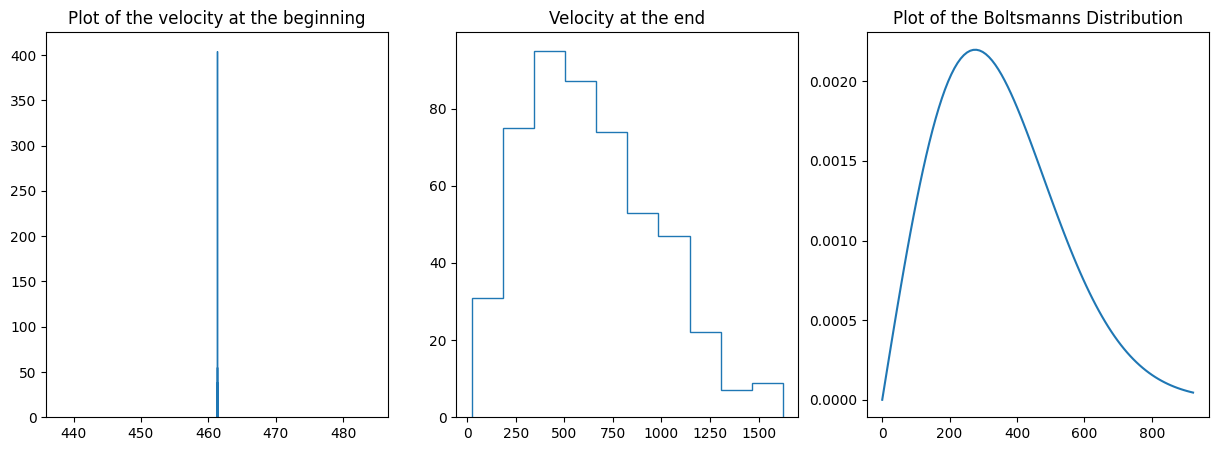

In [ ]:
figure_2m0 = Boltzmann_comparison(vel_start_m0, vel_end_m0, np.linspace(0,mean_velocity*2,100) )
plt.show()

**Velocity distribution when mass is equal to 4m0**

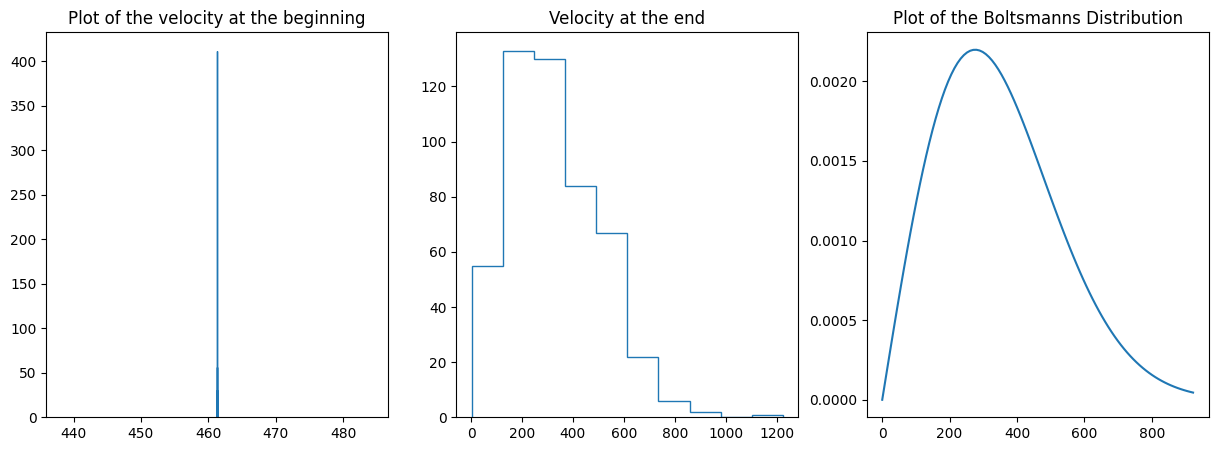

In [ ]:
figure_24m0 = Boltzmann_comparison(vel_start_4m0, vel_end_4m0, np.linspace(0,mean_velocity*2,100) )
plt.show()

**Task 3**



In [ ]:
# Initial Conditions
num_particles =1000
n = num_particles/mol

def van(V):  return (P + a * n**2 / V**2)*( V-n*b) - n*R*T 

sol = optimize.root(van, 10**(-10), method='krylov')
x_b = y_b =  sol.x**(1/3)  #Box boundaries given in meters
mass = [m_02, 4*m_02]
radius = [r_02]

In [ ]:
d_collision = 0.001
number_of_updates = 3000
system_3 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)
system_3.uniform_particles()
system_3.find_collisions()
system_3.elasticity = 1
vel_m0_e_1, vel_4m0_e_1 = Calculating_the_energy(system_3, number_of_updates, d_collision = 0.001)

In [ ]:
d_collision = 0.001
number_of_updates = 3000
system_3 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)
system_3.uniform_particles()
system_3.find_collisions()
system_3.elasticity = 0.9
vel_m0_e_09, vel_4m0_e_09 = Calculating_the_energy(system_3, number_of_updates, d_collision = 0.001)

In [ ]:
d_collision = 0.001
number_of_updates = 3000
system_3 = system(num_particles, elasticity,x_b, y_b,mean_velocity,mass,radius, tc)
system_3.uniform_particles()
system_3.find_collisions()
system_3.elasticity = 0.8
vel_m0_e_08, vel_4m0_e_08 = Calculating_the_energy(system_3, number_of_updates, d_collision = 0.001)


**The kinetic energy when the elasticity is 1**

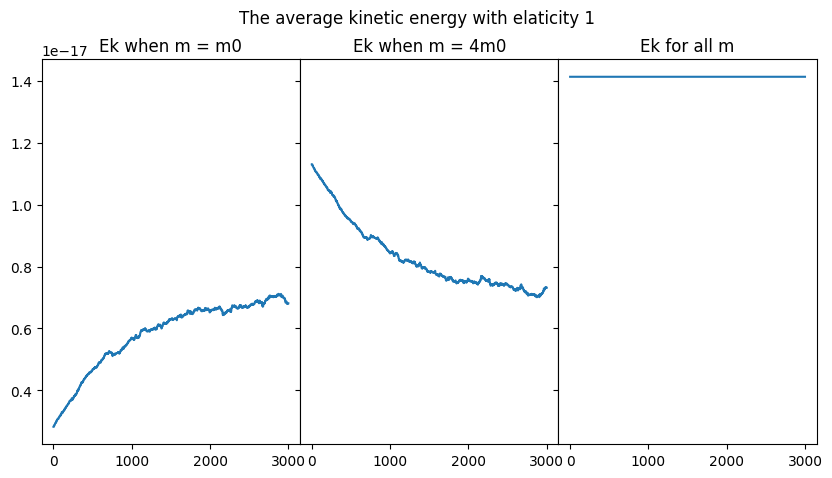

In [ ]:
fig_e_1 = plot_kinetic_energy(vel_m0_e_1,vel_4m0_e_1)
plt.show()

**The kinetic energy when the elasticity is 0.9**

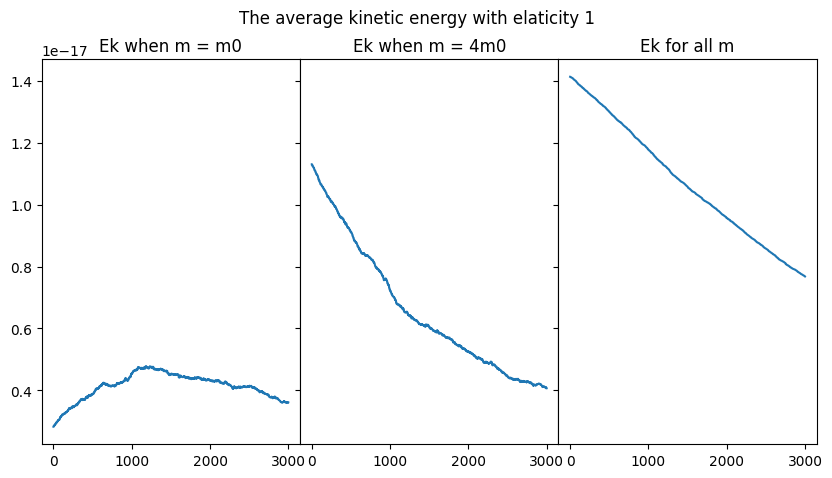

In [ ]:
fig_e_09 = plot_kinetic_energy(vel_m0_e_09,vel_4m0_e_09)
plt.show()

**The kinetic energy when elasticity is 0.8**

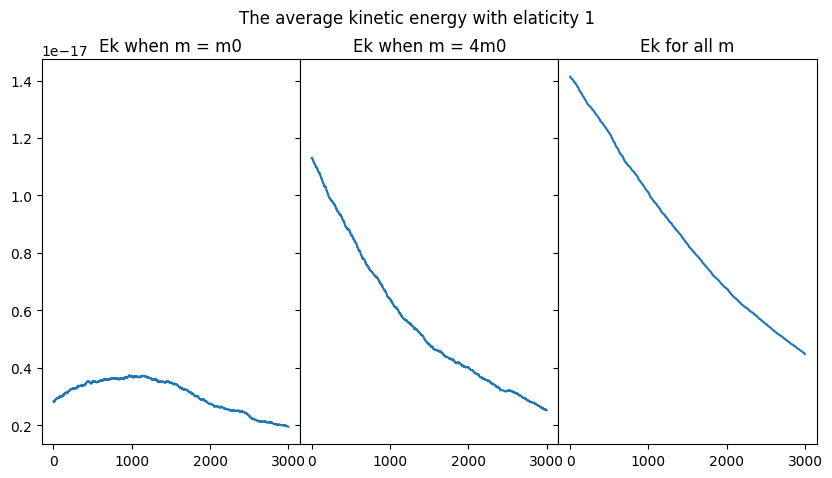

In [ ]:
fig_e_08 = plot_kinetic_energy(vel_m0_e_08,vel_4m0_e_08)
plt.show()

Task 4:

In [ ]:
num_particles =1000
elasticity= 1
x_boundaries = 1
y_boundaries = 1
mean_velocity = 0 #m/s
mu = 1
mass=[1]
radius=[.0005]
tc = 0

system_4 = system(num_particles, elasticity,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)
projectile = particle(position(0.5,0.75), velocity(0, -5), 5*radius[0], 25* mass[0])
system_4.particles.append(projectile)

system_4.crater()
system_4.find_collisions()

In [ ]:
x_list,y_list,vx_list,vy_list= evolution(system_4,300)

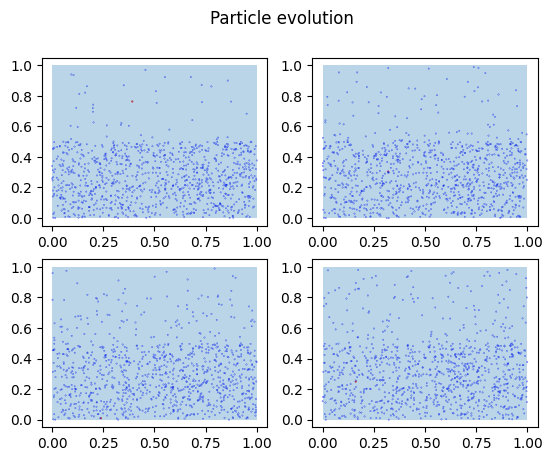

In [ ]:

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2)
fig.suptitle('Particle evolution')
r_list = []
for p in system_4.particles: 
    r_list.append(p.radius)
r_list = np.array(r_list)*100
c_list = ["red"]
for i in range(len(r_list)-1):
    c_list.append("blue")

ax1.scatter(x_list[0], y_list[0], s =r_list , color = c_list)
ax1.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))

ax2.scatter(x_list[1], y_list[1],s =r_list, color = c_list)
ax2.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))


ax3.scatter(x_list[2], y_list[2],s =r_list, color = c_list)
ax3.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))

ax4.scatter(x_list[3], y_list[3],s =r_list, color = c_list)
ax4.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))


plt.show()